In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('DelayFlights_clean.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,DayOfWeek,UniqueCarrier,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008-01-03,Thursday,WN,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-03,Thursday,WN,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-03,Thursday,WN,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
3,2008-01-03,Thursday,WN,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-03,Thursday,WN,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,10.0,0.0,0.0,0.0,47.0


### Nivell 1

- Exercici 1

Classifica els diferents vols utilitzant l'algorisme de K-means.

In [22]:
#quines variables agafem para classificar els diferents vols?


In [5]:
# pre-procesing data

In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
numerical_features= df[['ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']]

In [9]:
df_scaled = pd.DataFrame(scaler.fit_transform(numerical_features),
columns=numerical_features.columns)

In [10]:
df_scaled.head()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,-0.076009,0.217096,0.110453,-0.997419,-0.676706,0.075270,-0.529205,-0.707360,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
1,-0.076009,0.146943,0.066755,-0.719297,-0.472342,0.075270,-0.340694,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
2,-0.602769,-0.624739,-0.457615,-0.163054,-0.193663,-0.438336,-0.717716,-0.569458,-0.295637,-0.140533,-0.352627,-0.036508,0.411752
3,-0.450286,-0.273975,-0.311957,-0.562853,-0.360870,-0.137137,-0.529205,-0.569458,-0.349976,-0.140533,-0.352627,-0.036508,-0.466044
4,1.476549,1.620154,1.770959,0.236746,0.419429,1.435022,-0.717716,-0.776310,-0.078283,-0.140533,-0.352627,-0.036508,0.823218


In [11]:
df_days= pd.get_dummies(df['DayOfWeek'], prefix=None, drop_first=False)
df_days.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [12]:
df_carrier= pd.get_dummies(df['UniqueCarrier'], prefix=None, drop_first=False)
df_carrier.head()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
df_origin= pd.get_dummies(df['Origin'], prefix=None, drop_first=False)
df_origin.head()

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,AKN,ALB,ALO,AMA,ANC,ASE,ATL,ATW,AUS,AVL,AVP,AZO,BDL,BET,BFL,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CEC,CHA,CHO,CHS,CIC,CID,CLD,CLE,CLL,CLT,CMH,CMI,CMX,COD,COS,CPR,CRP,CRW,CSG,CVG,CWA,DAB,DAL,DAY,DBQ,DCA,DEN,DFW,DHN,DLG,DLH,DRO,DSM,DTW,EGE,EKO,ELM,ELP,ERI,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FLO,FNT,FSD,FSM,FWA,GCC,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRK,GRR,GSO,GSP,GST,GTF,GTR,GUC,HDN,HHH,HLN,HNL,HOU,HPN,HRL,HSV,HTS,IAD,IAH,ICT,IDA,ILM,IND,INL,IPL,ISP,ITH,ITO,IYK,JAC,JAN,JAX,JFK,JNU,KOA,KTN,LAN,LAS,LAW,LAX,LBB,LCH,LEX,LFT,LGA,LGB,LIH,LIT,LMT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCN,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MOB,MOD,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGG,OKC,OMA,OME,ONT,ORD,ORF,OTH,OTZ,OXR,PBI,PDX,PFN,PHF,PHL,PHX,PIA,PIH,PIR,PIT,PLN,PMD,PNS,PSC,PSE,PSG,PSP,PUB,PVD,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SDF,SEA,SFO,SGF,SGU,SHV,SIT,SJC,SJT,SJU,SLC,SLE,SMF,SMX,SNA,SPI,SPS,SRQ,STL,STT,STX,SUN,SUX,SWF,SYR,TEX,TLH,TOL,TPA,TRI,TUL,TUP,TUS,TVC,TWF,TXK,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
df_dest= pd.get_dummies(df['Dest'], prefix=None, drop_first=False)
df_dest.head()

,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,AKN,ALB,ALO,AMA,ANC,ASE,ATL,ATW,AUS,AVL,AVP,AZO,BDL,BET,BFL,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CEC,CHA,CHO,CHS,CIC,CID,CLD,CLE,CLL,CLT,CMH,CMI,CMX,COD,COS,CPR,CRP,CRW,CSG,CVG,CWA,DAB,DAL,DAY,DBQ,DCA,DEN,DFW,DHN,DLG,DLH,DRO,DSM,DTW,EGE,EKO,ELM,ELP,ERI,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FLO,FNT,FSD,FSM,FWA,GCC,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRK,GRR,GSO,GSP,GST,GTF,GTR,GUC,HDN,HHH,HLN,HNL,HOU,HPN,HRL,HSV,HTS,IAD,IAH,ICT,IDA,ILM,IND,INL,IPL,ISP,ITH,ITO,IYK,JAC,JAN,JAX,JFK,JNU,KOA,KTN,LAN,LAS,LAW,LAX,LBB,LCH,LEX,LFT,LGA,LGB,LIH,LIT,LMT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCN,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MOB,MOD,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGG,OKC,OMA,OME,ONT,ORD,ORF,OTH,OTZ,OXR,PBI,PDX,PFN,PHF,PHL,PHX,PIA,PIH,PIR,PIT,PLN,PMD,PNS,PSC,PSE,PSG,PSP,PVD,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SDF,SEA,SFO,SGF,SGU,SHV,SIT,SJC,SJT,SJU,SLC,SLE,SMF,SMX,SNA,SPI,SPS,SRQ,STL,STT,STX,SUN,SUX,SWF,SYR,TEX,TLH,TOL,TPA,TRI,TUL,TUP,TUS,TVC,TWF,TXK,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [15]:
df_month = pd.get_dummies(df["Date"].dt.month,prefix=None, drop_first=False)
df_month.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_final = pd.concat([df_scaled,df_days,df_carrier,df_origin,df_dest,df_month],axis=1)

In [17]:
df_final.tail()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,AKN,ALB,ALO,AMA,ANC,ASE,ATL,ATW,AUS,AVL,AVP,AZO,BDL,BET,BFL,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CEC,CHA,CHO,CHS,CIC,CID,CLD,CLE,CLL,CLT,CMH,CMI,CMX,COD,COS,CPR,CRP,CRW,CSG,CVG,CWA,DAB,DAL,DAY,DBQ,DCA,DEN,DFW,DHN,DLG,DLH,DRO,DSM,DTW,EGE,EKO,ELM,ELP,ERI,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FLO,FNT,FSD,FSM,FWA,GCC,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRK,GRR,GSO,GSP,GST,GTF,GTR,GUC,HDN,HHH,HLN,HNL,HOU,HPN,HRL,HSV,HTS,IAD,IAH,ICT,IDA,ILM,IND,INL,IPL,ISP,ITH,ITO,IYK,JAC,JAN,JAX,JFK,JNU,KOA,KTN,LAN,LAS,LAW,LAX,LBB,LCH,LEX,LFT,LGA,LGB,LIH,LIT,LMT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCN,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MOB,MOD,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGG,OKC,OMA,OME,ONT,ORD,ORF,OTH,OTZ,OXR,PBI,PDX,PFN,PHF,PHL,PHX,PIA,PIH,PIR,PIT,PLN,PMD,PNS,PSC,PSE,PSG,PSP,PUB,PVD,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SDF,SEA,SFO,SGF,SGU,SHV,SIT,SJC,SJT,SJU,SLC,SLE,SMF,SMX,SNA,SPI,SPS,SRQ,STL,STT,STX,SUN,SUX,SWF,SYR,TEX,TLH,TOL,TPA,TRI,TUL,TUP,TUS,TVC,TWF,TXK,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,AKN,ALB,ALO,AMA,ANC,ASE,ATL,ATW,AUS,AVL,AVP,AZO,BDL,BET,BFL,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BMI,BNA,BOI,BOS,BPT,BQK,BQN,BRO,BRW,BTM,BTR,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CDC,CDV,CEC,CHA,CHO,CHS,CIC,CID,CLD,CLE,CLL,CLT,CMH,CMI,CMX,COD,COS,CPR,CRP,CRW,CSG,CVG,CWA,DAB,DAL,DAY,DBQ,DCA,DEN,DFW,DHN,DLG,DLH,DRO,DSM,DTW,EGE,EKO,ELM,ELP,ERI,EUG,EVV,EWN,EWR,EYW,FAI,FAR,FAT,FAY,FCA,FLG,FLL,FLO,FNT,FSD,FSM,FWA,GCC,GEG,GFK,GGG,GJT,GNV,GPT,GRB,GRK,GRR,GSO,GSP,GST,GTF,GTR,GUC,HDN,HHH,HLN,HNL,HOU,HPN,HRL,HSV,HTS,IAD,IAH,ICT,IDA,ILM,IND,INL,IPL,ISP,ITH,ITO,IYK,JAC,JAN,JAX,JFK,JNU,KOA,KTN,LAN,LAS,LAW,LAX,LBB,LCH,LEX,LFT,LGA,LGB,LIH,LIT,LMT,LNK,LRD,LSE,LWB,LWS,LYH,MAF,MBS,MCI,MCN,MCO,MDT,MDW,MEI,MEM,MFE,MFR,MGM,MHT,MIA,MKE,MKG,MLB,MLI,MLU,MOB,MOD,MOT,MQT,MRY,MSN,MSO,MSP,MSY,MTJ,MYR,OAJ,OAK,OGG,OKC,OMA,OME,ONT,ORD,ORF,OTH,OTZ,OXR,PBI,PDX,PFN,PHF,PHL,PHX,PIA,PIH,PIR,PIT,PLN,PMD,PNS,PSC,PSE,PSG,PSP,PVD,PWM,RAP,RDD,RDM,RDU,RFD,RHI,RIC,RKS,RNO,ROA,ROC,ROW,RST,RSW,SAN,SAT,SAV,SBA,SBN,SBP,SCC,SCE,SDF,SEA,SFO,SGF,SGU,SHV,SIT,SJC,SJT,SJU,SLC,SLE,SMF,SMX,SNA,SPI,SPS,SRQ,STL,STT,STX,SUN,SUX,SWF,SYR,TEX,TLH,TOL,TPA,TRI,TUL,TUP,TUS,TVC,TWF,TXK,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM,1,2,3,4,5,6,7,8,9,10,11,12
1857418,-0.644356,-0.835198,-0.850893,-0.336880,-0.602392,-0.828329,-0.529205,1.016409,-0.349976,-0.140533,0.066806,-0.036508,-0.136871,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [25]:
df_final.shape


(1857423, 657)

In [19]:
from sklearn.cluster import KMeans

In [21]:
n_clusters = np.arange(1,11,1)
inercias = []
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300}
for cluster in n_clusters:
    knn = KMeans(n_clusters=cluster,**kmeans_kwargs)
    knn.fit(df_scaled)
    err = knn.inertia_
    print(err)
    inercias.append(err)


24146498.999997392
19313915.332251195
16412216.282582477
14988934.725566516
13770670.713370442
12611465.681371272
11477806.708914058
10978954.637278097
10345530.10898352
9916917.184263906


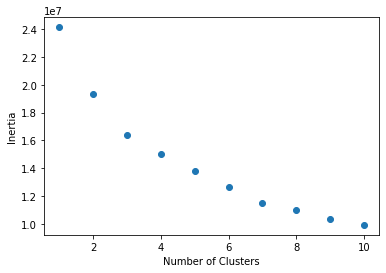

In [24]:
plt.scatter(n_clusters,inercias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()